In [46]:
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv("/content/drive/MyDrive/dataset_aaic/demo_data/3.concertriccir2.csv", names = ['x', 'y', 'class'])

In [48]:
df.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


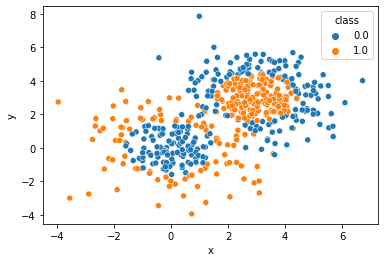

In [49]:
x = df.iloc[:, 0:2]
y = df['class']
sns.scatterplot(df['x'],df['y'], hue = df['class'])

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [65]:
params = {'C':list(range(1,100)), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}

In [66]:
gs = GridSearchCV(SVC(), params, n_jobs=-1, verbose=1)

In [67]:
best_model = gs.fit(x_train, y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:   58.7s finished


In [68]:
print(best_model.best_estimator_)

SVC(C=78, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [69]:
svc = best_model.best_estimator_.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svcaccuracy = accuracy_score(y_test, svc_pred)
print(svcaccuracy)

0.93


In [70]:
confusion_matrix(y_test, svc_pred)

array([[51,  4],
       [ 3, 42]])